In [ ]:
#%pip install pydot graphviz 
# OR if using Anaconda/Conda environment
#%conda install pydot graphviz
#!pip install tensorflow
#!pip install tf_keras
# Restart Kernel first (Kernel → Restart Kernel)
# Then run:
#!pip install --upgrade numpy==1.26.4

In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop

# Other utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

print("="*50)
print("Library Versions:")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras: {keras.__version__}")
print("="*50)
print("✓ All imports successful!")

2026-01-01 05:54:51.789516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Library Versions:
NumPy: 1.26.4
Pandas: 2.3.3
TensorFlow: 2.16.2
Keras: 3.13.0
✓ All imports successful!


In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

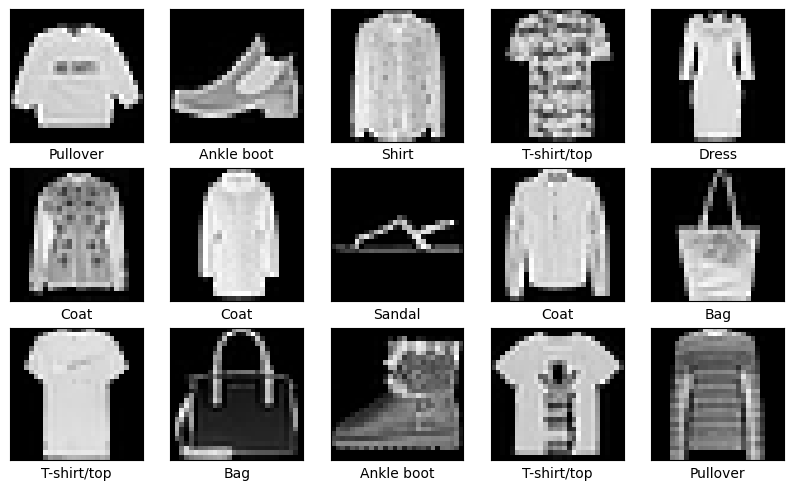

In [5]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [8]:
#Creating base neural network
import tf_keras as keras
from tf_keras import layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 24s 6ms/step - loss: 1.1155 - accuracy: 0.6252 - val_loss: 0.5411 - val_accuracy: 0.8066
Epoch 2/30
600/600 [==============================] - 3s 4ms/step - loss: 0.7463 - accuracy: 0.7469 - val_loss: 0.4878 - val_accuracy: 0.8373
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6796 - accuracy: 0.7718 - val_loss: 0.4685 - val_accuracy: 0.8354
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6407 - accuracy: 0.7887 - val_loss: 0.4691 - val_accuracy: 0.8437
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.6137 - accuracy: 0.7963 - val_loss: 0.4397 - val_accuracy: 0.8497
Epoch 6/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5991 - accuracy: 0.8009 - val_loss: 0.4338 - val_accuracy: 0.8563
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5855 - accuracy: 0.8056 - val_loss: 0.4262 - val_accuracy: 0.8594
Epoch

In [9]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 1ms/step - loss: 0.3767 - accuracy: 0.8725


In [ ]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

In [10]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 1s 1ms/step


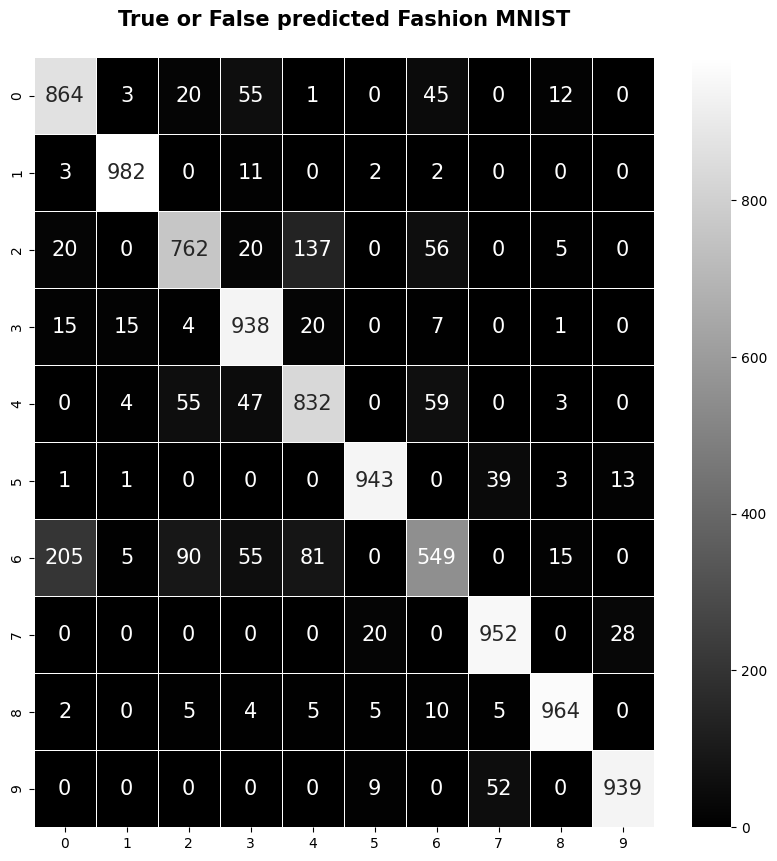

In [12]:
plt.style.use('seaborn-v0_8-deep')
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
#plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.81      0.76      0.79      1000
           3       0.83      0.94      0.88      1000
           4       0.77      0.83      0.80      1000
           5       0.96      0.94      0.95      1000
           6       0.75      0.55      0.64      1000
           7       0.91      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [14]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


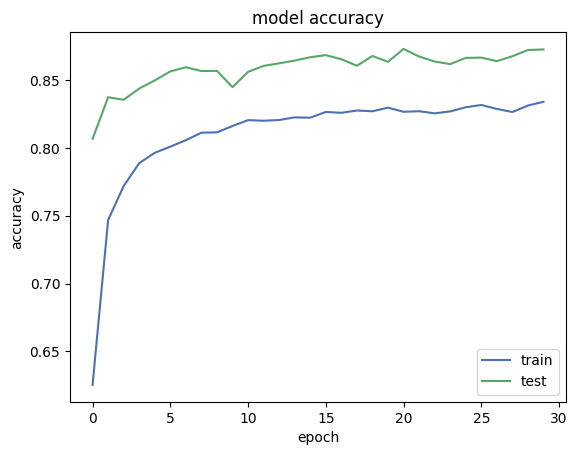

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


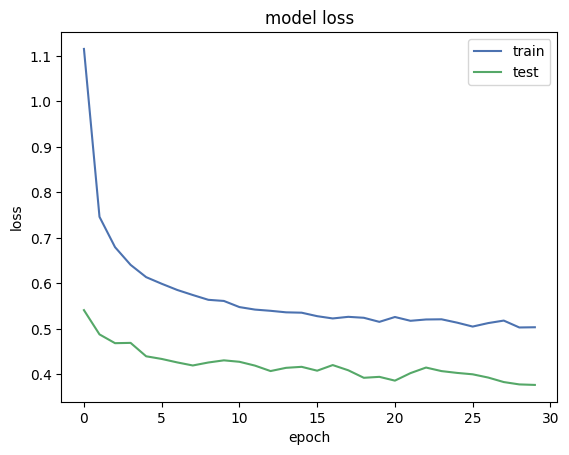

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [17]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 21ms/step


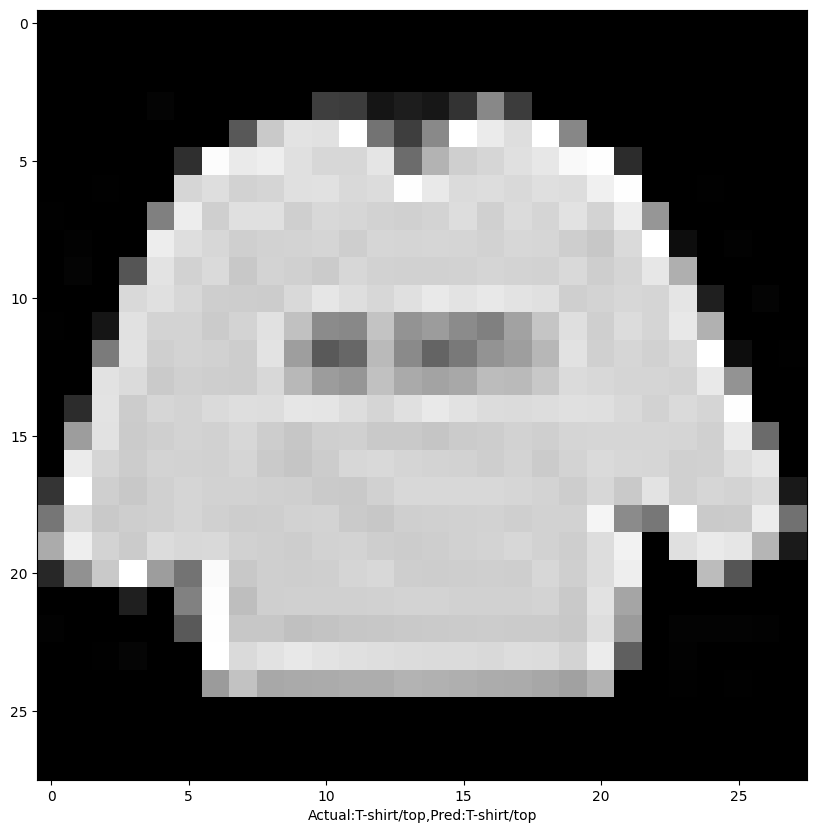

In [18]:
#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()